In [1]:
print('czesc,')

czesc,


In [2]:
x = 5

In [3]:
print(x)

5


# Preprocessing
trening

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
dataset = pd.read_csv('diabetes_preprocessing.csv')

In [9]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Continent
0,6,148,72,35,0,33.6,50,1,Europe
1,1,85,66,29,0,26.6,31,0,Europe
2,8,183,64,0,0,23.3,32,1,Asia
3,1,89,66,23,94,28.1,21,0,America
4,0,137,40,35,168,43.1,33,1,America
5,5,116,74,0,0,25.6,30,0,Asia
6,3,78,50,32,88,31.0,26,1,Asia
7,10,115,0,0,0,35.3,29,0,Europe
8,2,197,70,45,543,30.5,53,1,America
9,8,125,96,0,0,NaN,54,1,Europe


In [10]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,757.000000,768.000000,768.000000
mean,3.845052,120.708333,69.105469,20.536458,79.799479,33.253765,33.338542,0.348958
std,3.369578,32.489185,19.355807,15.952218,115.244002,23.210304,12.322269,0.476951
min,0.000000,-40.000000,0.000000,0.000000,0.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,642.000000,140.000000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              757 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
Continent        768 non-null object
dtypes: float64(1), int64(7), object(1)
memory usage: 54.1+ KB


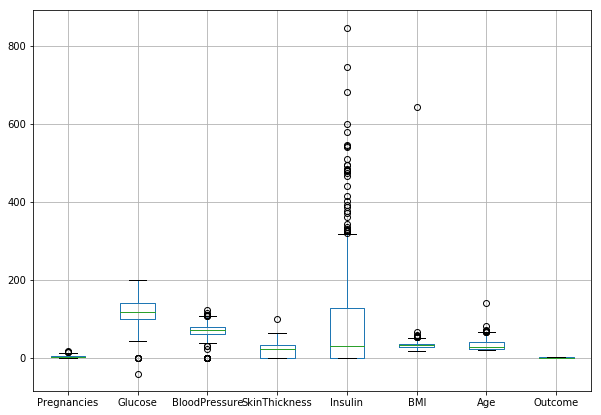

In [13]:
dataset.boxplot(figsize=(10, 7))

In [16]:
dataset.loc[dataset['Glucose'] <= 0, 'Glucose'] = None
dataset.loc[dataset['SkinThickness'] <= 0, 'SkinThickness'] = None
dataset.loc[dataset['Insulin'] <= 0, 'Insulin'] = None
dataset.loc[dataset['BloodPressure'] <= 0, 'BloodPressure'] = None

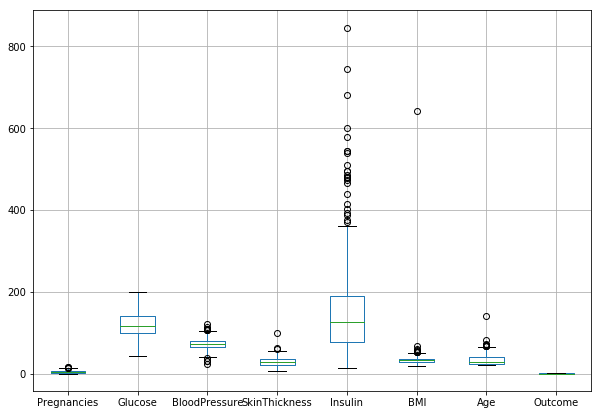

In [17]:
dataset.boxplot(figsize=(10, 7))

In [21]:
dataset['BMI'].quantile(q=0.99)

52.3

In [22]:
dataset.loc[dataset['BMI'] > dataset['BMI'].quantile(q=0.99), 'BMI'] = None
dataset.loc[dataset['Age'] > dataset['Age'].quantile(q=0.99), 'Age'] = None
dataset.loc[dataset['SkinThickness'] > dataset['SkinThickness'].quantile(q=0.99), 'SkinThickness'] = None

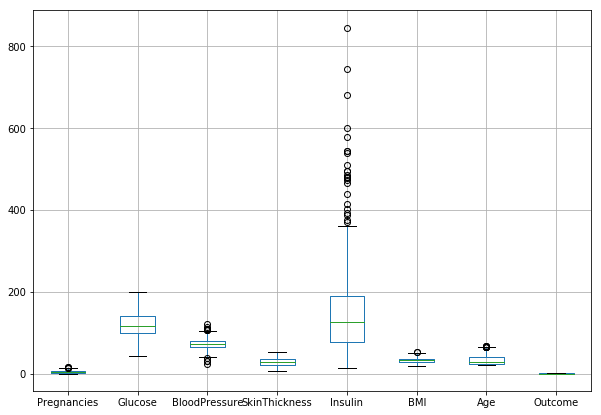

In [23]:
dataset.boxplot(figsize=(10, 7))

In [27]:
dataset.isna().any()

Pregnancies      False
Glucose           True
BloodPressure     True
SkinThickness     True
Insulin           True
BMI               True
Age               True
Outcome          False
Continent        False
dtype: bool

In [28]:
dataset.isna().sum()

Pregnancies        0
Glucose            6
BloodPressure     35
SkinThickness    233
Insulin          374
BMI               18
Age                7
Outcome            0
Continent          0
dtype: int64

In [29]:
dataset.loc[dataset['Glucose'].isna(), 'Glucose'] = dataset['Glucose'].median()
dataset.loc[dataset['SkinThickness'].isna(), 'SkinThickness'] = dataset['SkinThickness'].median()
dataset.loc[dataset['Insulin'].isna(), 'Insulin'] = dataset['Insulin'].median()
dataset.loc[dataset['BloodPressure'].isna(), 'BloodPressure'] = dataset['BloodPressure'].median()

In [30]:
dataset.isna().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI              18
Age               7
Outcome           0
Continent         0
dtype: int64

In [31]:
dataset.loc[dataset['BMI'].isna(), 'BMI'] = dataset['BMI'].median()
dataset.loc[dataset['Age'].isna(), 'Age'] = dataset['Age'].median()

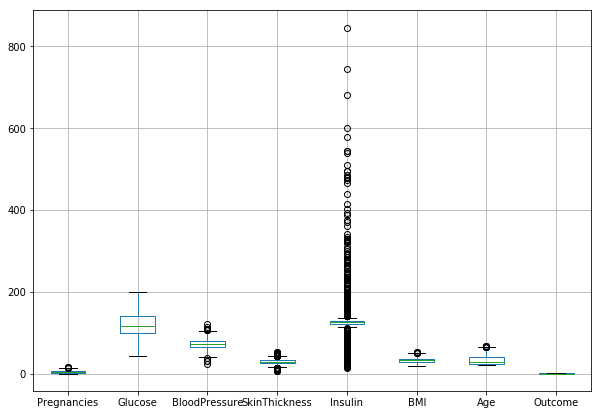

In [32]:
dataset.boxplot(figsize=(10, 7))

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null float64
BloodPressure    768 non-null float64
SkinThickness    768 non-null float64
Insulin          768 non-null float64
BMI              768 non-null float64
Age              768 non-null float64
Outcome          768 non-null int64
Continent        768 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


In [34]:
dataset['Continent'] = pd.Categorical(dataset['Continent']) 

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null float64
BloodPressure    768 non-null float64
SkinThickness    768 non-null float64
Insulin          768 non-null float64
BMI              768 non-null float64
Age              768 non-null float64
Outcome          768 non-null int64
Continent        768 non-null category
dtypes: category(1), float64(6), int64(2)
memory usage: 48.9 KB


In [36]:
dummies = pd.get_dummies(dataset['Continent'], prefix='Continent')

In [40]:
dummies.drop('Continent_Europe', axis=1, inplace=True)

In [42]:
df = pd.concat([dataset, dummies], axis=1)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Continent,Continent_America,Continent_Asia
0,6,148.0,72.0,35.0,125.0,33.6,50.0,1,Europe,0,0
1,1,85.0,66.0,29.0,125.0,26.6,31.0,0,Europe,0,0
2,8,183.0,64.0,29.0,125.0,23.3,32.0,1,Asia,0,1
3,1,89.0,66.0,23.0,94.0,28.1,21.0,0,America,1,0
4,0,137.0,40.0,35.0,168.0,43.1,33.0,1,America,1,0


In [44]:
df.drop('Continent', axis=1, inplace=True)

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Continent_America,Continent_Asia
0,6,148.0,72.0,35.0,125.0,33.6,50.0,1,0,0
1,1,85.0,66.0,29.0,125.0,26.6,31.0,0,0,0
2,8,183.0,64.0,29.0,125.0,23.3,32.0,1,0,1
3,1,89.0,66.0,23.0,94.0,28.1,21.0,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,33.0,1,1,0


In [46]:
df.isna().sum()

Pregnancies          0
Glucose              0
BloodPressure        0
SkinThickness        0
Insulin              0
BMI                  0
Age                  0
Outcome              0
Continent_America    0
Continent_Asia       0
dtype: int64

In [47]:
corr = df.corr()

In [48]:
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Continent_America,Continent_Asia
Pregnancies,1,0.128448,0.208615,0.10553,0.0250475,0.0452377,0.554682,0.221898,-0.0242045,-0.0199976
Glucose,0.128448,1,0.220753,0.167914,0.419438,0.234025,0.277842,0.492457,0.0266885,0.00853333
BloodPressure,0.208615,0.220753,1,0.19625,0.0453633,0.26373,0.314195,0.165723,0.0443993,-0.0932413
SkinThickness,0.10553,0.167914,0.19625,1,0.184335,0.536596,0.120833,0.21408,-0.0315655,-0.0504063
Insulin,0.0250475,0.419438,0.0453633,0.184335,1,0.199488,0.112675,0.20379,-0.0352734,-0.00454151
BMI,0.0452377,0.234025,0.26373,0.536596,0.199488,1,0.0636287,0.300726,-0.0165273,-0.0460539
Age,0.554682,0.277842,0.314195,0.120833,0.112675,0.0636287,1,0.265094,-0.0506879,0.0283044
Outcome,0.221898,0.492457,0.165723,0.21408,0.20379,0.300726,0.265094,1,-0.0276902,0.0219594
Continent_America,-0.0242045,0.0266885,0.0443993,-0.0315655,-0.0352734,-0.0165273,-0.0506879,-0.0276902,1,-0.531405
Continent_Asia,-0.0199976,0.00853333,-0.0932413,-0.0504063,-0.00454151,-0.0460539,0.0283044,0.0219594,-0.531405,1


# Skalowanie

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [58]:
df_minmax = df.copy()
df_std = df.copy()

In [51]:
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

In [52]:
df_minmax = scaler_minmax.fit_transform(df_minmax)

C:\Users\Wioletka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
df_minmax = pd.DataFrame(df_minmax, columns=df.columns)

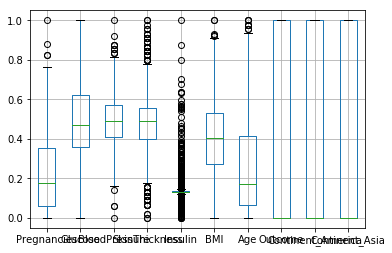

In [56]:
df_minmax.boxplot()

In [61]:
df_minmax_inversed = scaler_minmax.inverse_transform(df_minmax)

In [63]:
df_minmax_inversed = pd.DataFrame(df_minmax_inversed, columns=df.columns)

In [64]:
df_minmax_inversed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Continent_America,Continent_Asia
0,102.0,22984.0,7080.0,1582.0,104014.0,1163.960,2321.0,1.0,0.0,0.0
1,17.0,13219.0,6492.0,1312.0,104014.0,925.260,1447.0,0.0,0.0,0.0
2,136.0,28409.0,6296.0,1312.0,104014.0,812.730,1493.0,1.0,0.0,1.0
3,17.0,13839.0,6492.0,1042.0,78222.0,976.410,987.0,0.0,1.0,0.0
4,0.0,21279.0,3944.0,1582.0,139790.0,1487.910,1539.0,1.0,1.0,0.0
5,85.0,18024.0,7276.0,1312.0,104014.0,891.160,1401.0,0.0,0.0,1.0
6,51.0,12134.0,4924.0,1447.0,73230.0,1075.300,1217.0,1.0,0.0,1.0
7,170.0,17869.0,7080.0,1312.0,104014.0,1221.930,1355.0,0.0,0.0,0.0
8,34.0,30579.0,6884.0,2032.0,451790.0,1058.250,2459.0,1.0,1.0,0.0
9,136.0,19419.0,9432.0,1312.0,104014.0,1111.105,2505.0,1.0,0.0,0.0


In [65]:
df.to_csv('jakkolwiek.csv')

In [59]:
df_std = scaler_std.fit_transform(df_std)
df_std = pd.DataFrame(df_std, columns=df.columns)

C:\Users\Wioletka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Wioletka\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


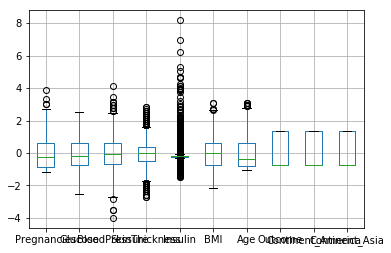

In [60]:
df_std.boxplot()